In [1]:
from scipy.interpolate import griddata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../measurements/JPEG_manager_dyanmic2/characteristic.csv")
# df = pd.read_csv("../measurements/JPEG_manager_sparsity/characteristic.csv")

In [3]:
df.head()

,pruning_thresh,quality,technique,bandwidth,mAP_drop,frame_id,sparsity,decomposability,regularity,pictoriality,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr
0,0.05,92,1,2.498029e+07,40,1,-1,-1,-1,-1,38398,39142,13.467377,18.473873,20
1,0.05,92,1,2.492123e+07,40,2,-1,-1,-1,-1,28669,29413,19.505306,18.517654,20
2,0.05,92,1,2.482305e+07,40,3,-1,-1,-1,-1,27481,28225,23.767583,18.590892,20
3,0.05,92,1,2.468615e+07,40,4,-1,-1,-1,-1,19647,20391,23.742502,18.693992,20
4,0.05,92,1,2.451106e+07,40,5,-1,-1,-1,-1,10792,11536,22.784839,18.827530,20


In [4]:
tensor_size = 128*26*26*4
df["cmp"] = tensor_size/df["datasize_real"]

In [5]:
sample_space = [[0.05, 60],[0.05,100],[0.35,60],[0.35,100]]
sample_space_cmp = [30, 0, 240, 180]

In [6]:
thresh = df["pruning_thresh"].to_numpy()
quality = df["quality"].to_numpy()
cmp_m = df["cmp"].to_numpy()

In [7]:
est_err = []
history_point = []
history_snr =[]
est_all = []
for i in range(len(thresh)):
    sample_points = sample_space+history_point
    sample_snrs = sample_space_cmp +history_snr
    # snr_est = griddata(sample_points, sample_snrs, (thresh[i],quality[i]), method='cubic')
    snr_est = griddata(sample_points, sample_snrs, (thresh[i],quality[i]), method='linear')
    est_all.append(snr_est)
    est_err.append(snr_est-cmp_m[i])
    history_point.append((thresh[i],quality[i]))
    history_snr.append(cmp_m[i])


In [8]:
est_err_window = []
est_snr_window = []
window_size = 3
history_point = []
history_snr =[]

for i in range(len(thresh)):
    sample_points = sample_space+history_point
    sample_snrs = sample_space_cmp +history_snr
    # snr_est = griddata(sample_points, sample_snrs, (thresh[i],quality[i]), method='cubic')
    snr_est = griddata(sample_points, sample_snrs, (thresh[i],quality[i]), method='cubic')
    est_snr_window.append(snr_est)
    est_err_window.append(snr_est-cmp_m[i])

    if len(history_point)<window_size:
        history_point.append((thresh[i],quality[i]))
        history_snr.append(cmp_m[i])
    else:
        index = i%window_size
        history_point[index] = (thresh[i],quality[i])
        history_snr[index] =  cmp_m[i]


In [9]:
est_err_window2 = []
est_snr_window2 = []
window_size = 20
history_point2 = []
history_snr2 =[]

for i in range(len(thresh)):
    sample_points = sample_space+history_point2
    sample_snrs = sample_space_cmp +history_snr2
    # snr_est = griddata(sample_points, sample_snrs, (thresh[i],quality[i]), method='cubic')
    snr_est = griddata(sample_points, sample_snrs, (thresh[i],quality[i]), method='cubic')
    est_snr_window2.append(snr_est)
    est_err_window2.append(snr_est-cmp_m[i])

    if len(history_point2)<window_size:
        history_point2.append((thresh[i],quality[i]))
        history_snr2.append(cmp_m[i])
    else:
        index = i%window_size
        history_point2[index] = (thresh[i],quality[i])
        history_snr2[index] =  cmp_m[i]

Text(0, 0.5, 'compression ratio estimation error')

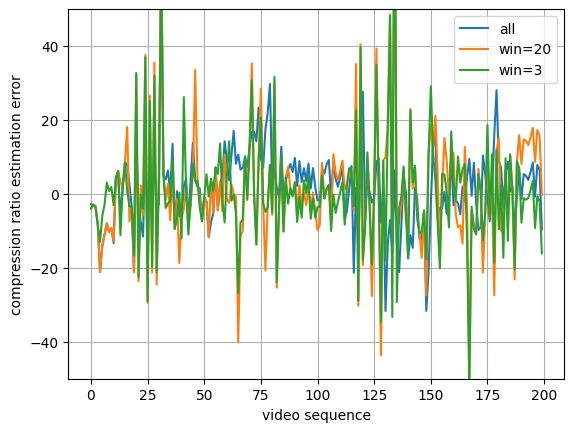

In [15]:
plt.figure()
plt.plot(est_err,label="all")
plt.plot(est_err_window2, label="win=20")
plt.plot(est_err_window,label="win=3")
plt.ylim([-50,50])
plt.legend()
plt.grid()
plt.xlabel("video sequence")
plt.ylabel("compression ratio estimation error")

Text(0, 0.5, 'compression ratio estimation')

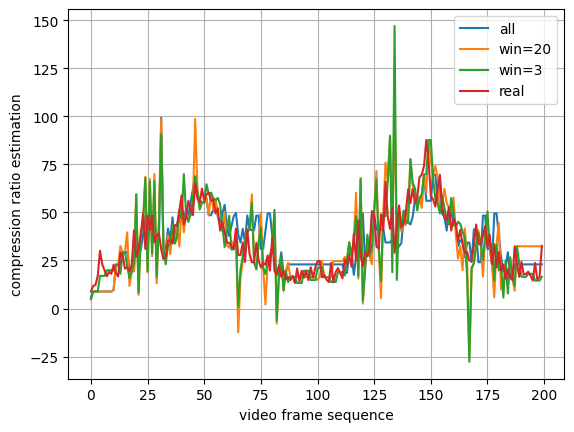

In [17]:
plt.figure()
plt.plot(est_all,label="all")
plt.plot(est_snr_window2,label="win=20")
plt.plot(est_snr_window,label="win=3")
plt.plot(cmp_m,label="real")
plt.legend()
plt.grid()
plt.xlabel("video frame sequence")
plt.ylabel("compression ratio estimation")

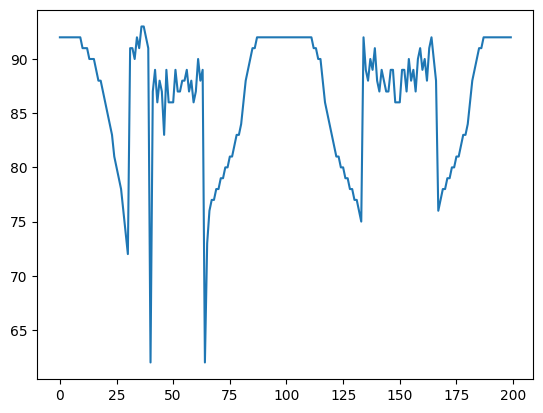

In [12]:
plt.figure()
plt.plot(quality)